In [ ]:
import pandas as pd

def process_matrix_data(file_path):
    """
    Loads a CSV, removes 'error' and 'error percentage' columns,
    and filters rows where 'Configuration' does not contain
    'warpCostumReduction' or 'warpCostumShuffle'.

    Args:
        file_path (str): The path to your CSV file.

    Returns:
        pd.DataFrame: The processed DataFrame.
    """
    try:
        # Load the CSV file
        df = pd.read_csv(file_path)

        # Drop the 'error' and 'error percentage' columns
        columns_to_drop = ['error', 'error percentage','Matrix Format','Mode']
        df = df.drop(columns=columns_to_drop, errors='ignore')

        # Filter rows based on the 'Configuration' column
        # Keep rows where 'Configuration' contains 'warpCostumReduction'
        # OR 'warpCostumShuffle'
        df = df[df['Configuration'].str.contains('warpCostumReduction|warpCostumShuffle', na=False)]

        return df

    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return pd.DataFrame() # Return an empty DataFrame on error
    except KeyError as e:
        print(f"Error: A required column was not found. Please check your CSV structure. Missing column: {e}")
        return pd.DataFrame()
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return pd.DataFrame()

# --- Usage Example ---
if __name__ == "__main__":
    csv_file = 'testF.csv' # Make sure to replace with your actual CSV file name

    # Create a dummy CSV for demonstration if it doesn't exist
    try:
        with open(csv_file, 'x') as f:
            f.write("Matrix Name,Matrix Format,Mode,Configuration,nz,Hack,Threads,Threads for block,Measure Index,Measure Value,error,error percentage\n")
            f.write("MatrixA,Format1,Mode1,warpCostumReduction,100,True,8,32,1,0.5,0.01,1.0\n")
            f.write("MatrixB,Format2,Mode2,someOtherConfig,200,False,16,64,2,0.8,0.02,2.0\n")
            f.write("MatrixC,Format3,Mode3,warpCostumShuffle_test,150,True,4,16,3,0.7,0.015,1.5\n")
            f.write("MatrixD,Format4,Mode4,anotherConfig,300,False,32,128,4,0.9,0.03,3.0\n")
            f.write("MatrixE,Format5,Mode5,warpCostumReduction_v2,250,True,64,256,5,0.6,0.012,1.2\n")
            f.write("MatrixF,Format6,Mode6,justAConfig,120,False,8,32,6,0.4,0.008,0.8\n")
    except FileExistsError:
        pass # File already exists, no need to create

    processed_df = process_matrix_data(csv_file)

    originale_df=pd.read_csv(csv_file)



In [45]:
print(processed_df)

          Matrix Name        Configuration       nz  Hack   Threads  \
180         cage4.mtx  warpCostumReduction       49     4        36   
181         cage4.mtx  warpCostumReduction       49     4        36   
182         cage4.mtx  warpCostumReduction       49     4        36   
183         cage4.mtx  warpCostumReduction       49     4        36   
184         cage4.mtx  warpCostumReduction       49     4        36   
...               ...                  ...      ...   ...       ...   
10990  roadNet-PA.mtx    warpCostumShuffle  3083796    32  34909440   
10991  roadNet-PA.mtx    warpCostumShuffle  3083796    32  34909440   
10992  roadNet-PA.mtx    warpCostumShuffle  3083796    32  34909440   
10993  roadNet-PA.mtx    warpCostumShuffle  3083796    32  34909440   
10994  roadNet-PA.mtx    warpCostumShuffle  3083796    32  34909440   

       Threads for block  Measure Index  Measure Value  
180                   16              0       0.003272  
181                   16         

In [46]:
def calculate_max_measure_value(df):
    """
    Calculates the max of 'Measure Value' for each unique combination
    of Matrix Name, Configuration, nz, Hack, Threads, and Threads for block.

    Args:
        df (pd.DataFrame): The input DataFrame with test results.

    Returns:
        pd.DataFrame: A new DataFrame with the max 'Measure Value'
                      for each unique test combination.
    """
    group_columns = [
        'Matrix Name',
        'Configuration',
        'nz',
        'Hack',
        'Threads',
        'Threads for block'
    ]

    # Group by the specified columns and calculate the max of 'Measure Value'
    max_df = df.groupby(group_columns)['Measure Value'].max().reset_index()

    # Do NOT rename the column
    return max_df


In [47]:
processed_df=calculate_max_measure_value(processed_df)
print(processed_df.head(1))

         Matrix Name        Configuration         nz  Hack  Threads  \
0  Cube_Coup_dt0.mtx  warpCostumReduction  127206144     4  8659040   

   Threads for block  Measure Value  
0                 16      35.130348  


In [48]:
processed_df = processed_df.rename(columns={'Hack': 'Mini Warp Size'})
processed_df['Threads for block'] = processed_df['Threads for block'] * processed_df['Mini Warp Size']

In [49]:
print(processed_df.head(0))
# Count unique combinations
num_combinations = processed_df.drop_duplicates(subset=['Configuration', 'Mini Warp Size', 'Threads for block']).shape[0]
print("Number of unique combinations:", num_combinations)

Empty DataFrame
Columns: [Matrix Name, Configuration, nz, Mini Warp Size, Threads, Threads for block, Measure Value]
Index: []
Number of unique combinations: 22


<Figure size 1000x600 with 0 Axes>

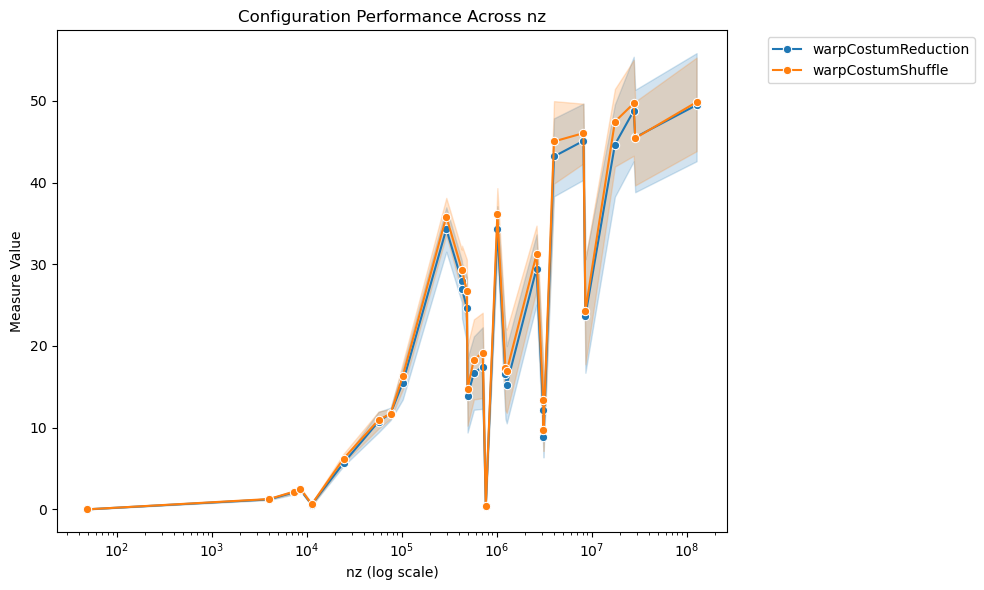

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=processed_df,
    x='nz',
    y='Measure Value',
    hue='Configuration',
    marker='o'
)
plt.xscale('log')
plt.xlabel('nz (log scale)')
plt.ylabel('Measure Value')
plt.title('Configuration Performance Across nz')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

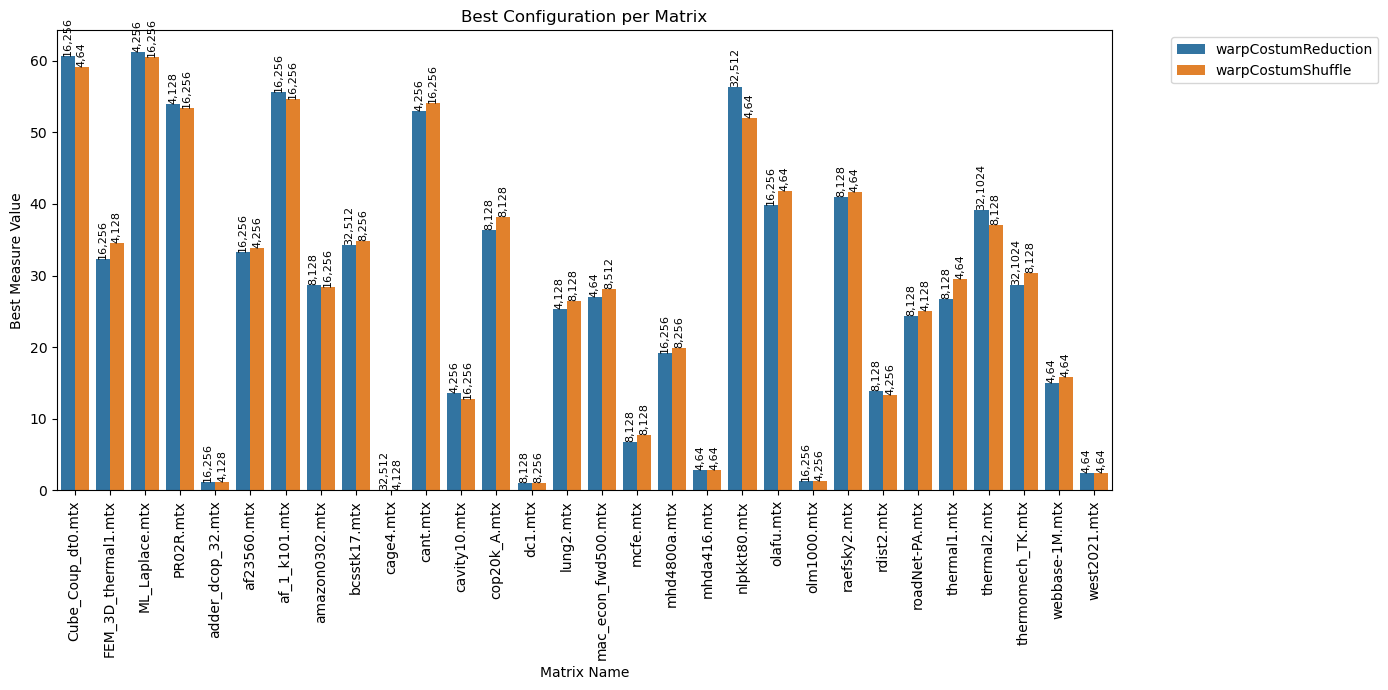

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the best (lowest Measure Value) for each (Matrix Name, Configuration)
best_df = processed_df.loc[
    processed_df.groupby(['Matrix Name', 'Configuration'])['Measure Value'].idxmax()
]

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=best_df,
    x='Matrix Name',
    y='Measure Value',
    hue='Configuration'
)
plt.xlabel('Matrix Name')
plt.ylabel('Best Measure Value')
plt.title('Best Configuration per Matrix')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with Mini Warp Size and Threads for block
for p, (_, row) in zip(ax.patches, best_df.iterrows()):
    height = p.get_height()
    ax.annotate(
        f"{row['Mini Warp Size']},{row['Threads for block']}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom', fontsize=8, rotation=90
    )

plt.tight_layout()
plt.show()

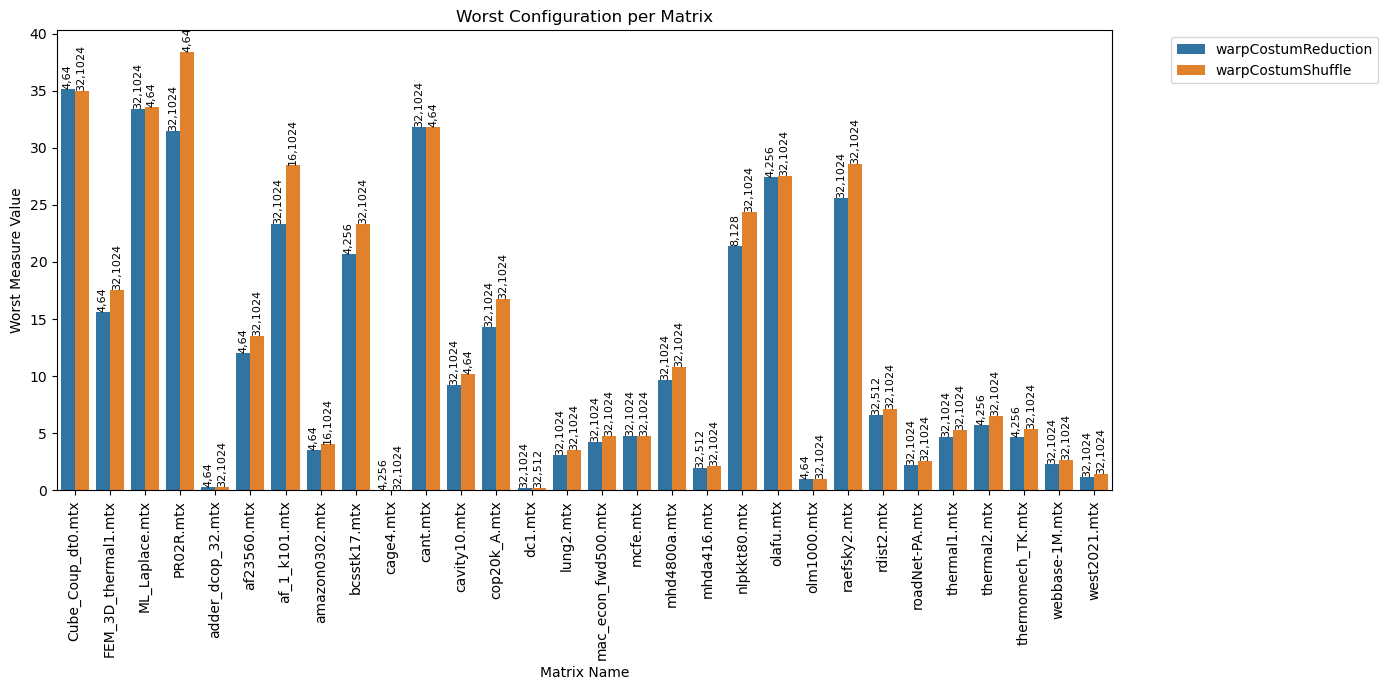

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the best (lowest Measure Value) for each (Matrix Name, Configuration)
best_df = processed_df.loc[
    processed_df.groupby(['Matrix Name', 'Configuration'])['Measure Value'].idxmin()
]

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=best_df,
    x='Matrix Name',
    y='Measure Value',
    hue='Configuration'
)
plt.xlabel('Matrix Name')
plt.ylabel('Worst Measure Value')
plt.title('Worst Configuration per Matrix')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate each bar with Mini Warp Size and Threads for block
for p, (_, row) in zip(ax.patches, best_df.iterrows()):
    height = p.get_height()
    ax.annotate(
        f"{row['Mini Warp Size']},{row['Threads for block']}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom', fontsize=8, rotation=90
    )

plt.tight_layout()
plt.show()

In [56]:
group_columns = [
    'Matrix Name',
    'Matrix Format',
    'Mode',
    'Configuration',
]

# For each group, pick the row with the max Measure Value
max_df =originale_df.loc[originale_df.groupby(group_columns)['Measure Value'].idxmax()].reset_index(drop=True)
max_df.head(10)

,Matrix Name,Matrix Format,Mode,Configuration,nz,Hack,Threads,Threads for block,Measure Index,Measure Value,error,error percentage
0,Cube_Coup_dt0.mtx,csr,cuda,simple_serial,127206144,0,2164760,32,0,28.355341,18.495701,0.0
1,Cube_Coup_dt0.mtx,csr,cuda,warp,127206144,0,2164760,128,4,58.596578,32.555810,0.0
2,Cube_Coup_dt0.mtx,csr,cuda,warpCostumReduction,127206144,16,34636160,16,0,60.641806,34.082120,0.0
3,Cube_Coup_dt0.mtx,csr,cuda,warpCostumShuffle,127206144,16,34636160,16,2,59.159048,34.082120,0.0
4,Cube_Coup_dt0.mtx,csr,cuda,warp_coalescent,127206144,0,2164760,128,2,51.570617,32.555810,0.0
5,Cube_Coup_dt0.mtx,csr,openMp,simple,127206144,0,16,0,2,5.543774,0.000000,0.0
6,Cube_Coup_dt0.mtx,csr,serial,simple_linear,127206144,0,1,0,4,1.739695,0.000000,0.0
7,Cube_Coup_dt0.mtx,hll,cuda,kernel warp colonne,127206144,32,2164760,64,4,60.887955,0.000000,0.0
8,Cube_Coup_dt0.mtx,hll,cuda,kernel1,127206144,64,2164760,64,4,60.168189,0.000000,0.0
9,Cube_Coup_dt0.mtx,hll,cuda,kernel2,127206144,64,2164760,64,0,59.529805,0.000000,0.0


/tmp/ipykernel_6565/3442647444.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csr_df['Mode+Config'] = csr_df['Mode'].astype(str) + ' | ' + csr_df['Configuration'].astype(str)


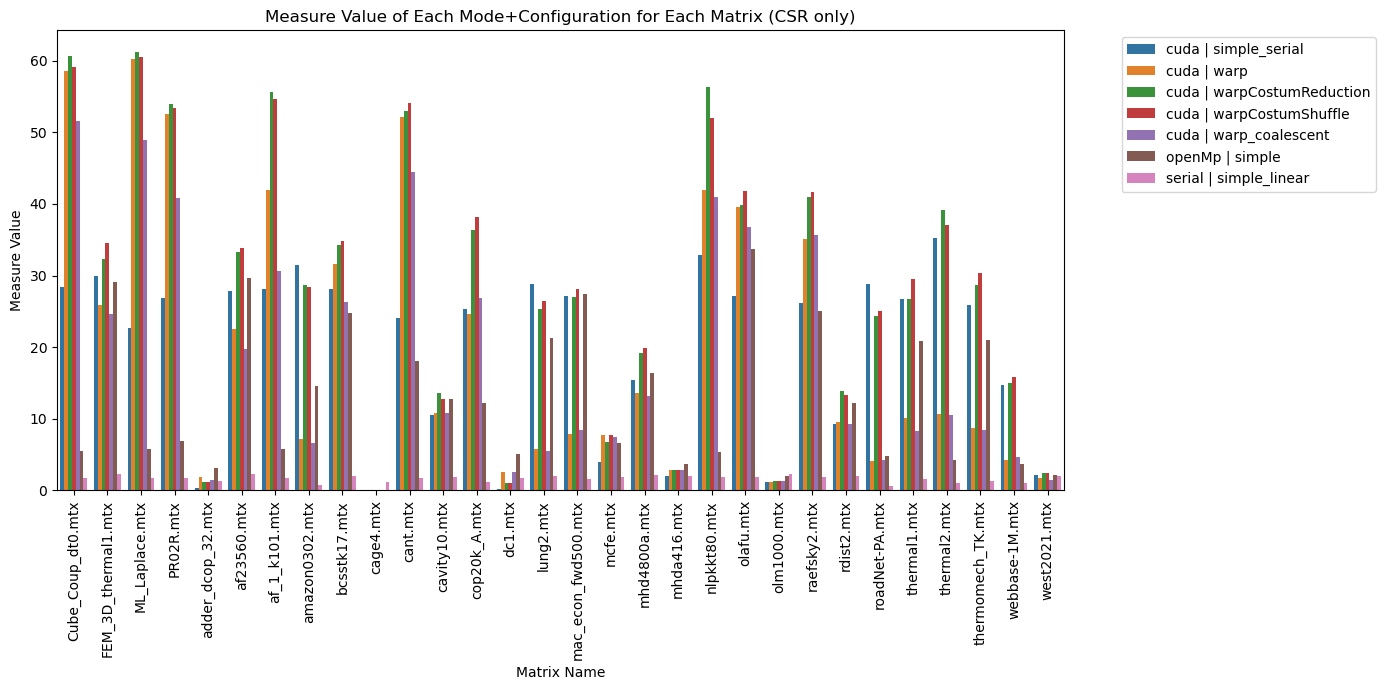

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only CSR format
csr_df = max_df[max_df['Matrix Format'] == 'csr']

csr_df['Mode+Config'] = csr_df['Mode'].astype(str) + ' | ' + csr_df['Configuration'].astype(str)

plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=csr_df,
    x='Matrix Name',
    y='Measure Value',
    hue='Mode+Config',
    errorbar=None,   # For Seaborn >= 0.12
    edgecolor=None
)
plt.xlabel('Matrix Name')
plt.ylabel('Measure Value')
plt.title('Measure Value of Each Mode+Configuration for Each Matrix (CSR only)')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [73]:
import numpy as np

# 1. Find the best (lowest Measure Value) for each Matrix Name
best_csr = csr_df.loc[csr_df.groupby('Matrix Name')['Measure Value'].idxmax()].copy()

# 2. Format nz as power of 10 (e.g., 1e3, 1e4, etc.)
best_csr['nz_pow10'] = best_csr['nz'].apply(lambda x: f"10^{int(np.log10(x))}" if x > 0 else str(x))

# 3. Add a * to Threads for block
best_csr['Threads for block*'] = best_csr['Threads for block'].astype(str) + '*'

# 4. Select and rename columns for the table, including Mode
table = best_csr[['Matrix Name', 'Mode', 'Configuration', 'nz_pow10', 'Hack', 'Threads for block*', 'Measure Value']]
table = table.rename(columns={
    'Mode': 'Mode',
    'Configuration': 'Best Configuration',
    'nz_pow10': 'nz (power of 10)',
    'Hack': 'Hack',
    'Threads for block*': 'Threads for block*',
    'Measure Value': 'Best Measure Value'
})

# 5. Display the table
print(table.to_string(index=False))

# 6. Annotation for the asterisk
print("\n* 'Threads for block*' column: Value marked with * for annotation purposes.")

        Matrix Name   Mode  Best Configuration nz (power of 10)  Hack Threads for block*  Best Measure Value
  Cube_Coup_dt0.mtx   cuda warpCostumReduction             10^8    16                16*           60.641806
FEM_3D_thermal1.mtx   cuda   warpCostumShuffle             10^5     4                32*           34.514423
     ML_Laplace.mtx   cuda warpCostumReduction             10^7    16                16*           61.189521
          PR02R.mtx   cuda warpCostumReduction             10^6    16                16*           54.008758
  adder_dcop_32.mtx openMp              simple             10^4     0                 0*            3.113796
        af23560.mtx   cuda   warpCostumShuffle             10^5     4                64*           33.779017
      af_1_k101.mtx   cuda warpCostumReduction             10^7     8                16*           55.576695
     amazon0302.mtx   cuda       simple_serial             10^6     0                32*           31.540585
       bcsstk17.mtx